# BASICS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Replace 'path/to/your/dataset.csv' with the actual file path
#dataframe = pd.read_csv('path/to/your/dataset.csv')

#X = dataframe.drop('target_column_name', axis=1)  # Replace 'target_column_name' with your target column
#y = dataframe['target_column_name']  # The target variable

# Perform the split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()

# Fit on training set only
#scaler.fit(X_train)

# Apply transform to both the training set and the test set
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)


# creating pandas dataframe from given table / using input values

In [ ]:
data = {
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [30, 25, 35]
}

df = pd.DataFrame(data)

print(df)

# renaming column

In [ ]:
# Correct way to rename a column
df = df.rename(columns={'ID': 'index', 'Age': 'aged'})
df

In [ ]:
# Drop the 'ID' and 'Age' columns
df = df.drop(['index', 'aged'], axis=1)
df

In [ ]:
df1 = pd.DataFrame({
    'ID': ['1', '2', '3','4'],  # These should be integers
    'Age': ['30', '25', '35','50'],  # These should be integers
    'Salary': [5000.00, 6000.50, 5500.75,4000.0],  # This is fine as float
    'Senior': ['True', 'False', 'True','True']  # These should be boolean
})

In [ ]:
# Convert 'ID' and 'Age' to integers, and 'Senior' to boolean
df1['ID'] = df1['ID'].astype(int)
df1['Age'] = df1['Age'].astype(int)
df1['Salary'] = df1['Salary'].astype(int) #write in inverted

# Check the new data types
print(df1.dtypes)

ID         int64
Age        int64
Salary     int64
Senior    object
dtype: object


# LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df1['Salary_encoded'] = label_encoder.fit_transform(df1['Salary'])
df1

,ID,Age,Salary,Senior,Salary_encoded
0,1,30,5000,True,1
1,2,25,6000,False,3
2,3,35,5500,True,2
3,4,50,4000,True,0


# E1 E2 E3 MANUAL LEAVE ONE OUT CLASSWORK

In [ ]:
# import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression

# Data points
data_points = np.array([[1, 3], [4, 3.5], [6, 5]])

# Function to compute the mean squared error for constant and linear model
def loocv_constant_linear(data):
    constant_errors = []
    linear_errors = []

    for i in range(len(data)):
        # Leave one out cross validation setup
        train = np.delete(data, i, 0)
        test = data[i]

        # Constant model - predict the mean of y
        constant_prediction = np.mean(train[:, 1])
        constant_error = (constant_prediction - test[1]) ** 2
        constant_errors.append(constant_error)

        # Linear model - fit the model on train data
        linear_model = LinearRegression().fit(train[:, 0].reshape(-1, 1), train[:, 1])

        # Predict on the test data
        linear_prediction = linear_model.predict(test[0].reshape(-1, 1))
        linear_error = (linear_prediction - test[1]) ** 2
        linear_errors.append(linear_error[0])

    return np.mean(constant_errors), np.mean(linear_errors)

# Calculate the LOOCV error for both models
constant_error, linear_error = loocv_constant_linear(data_points)
constant_error, linear_error

(1.625, 1.6378703703703703)

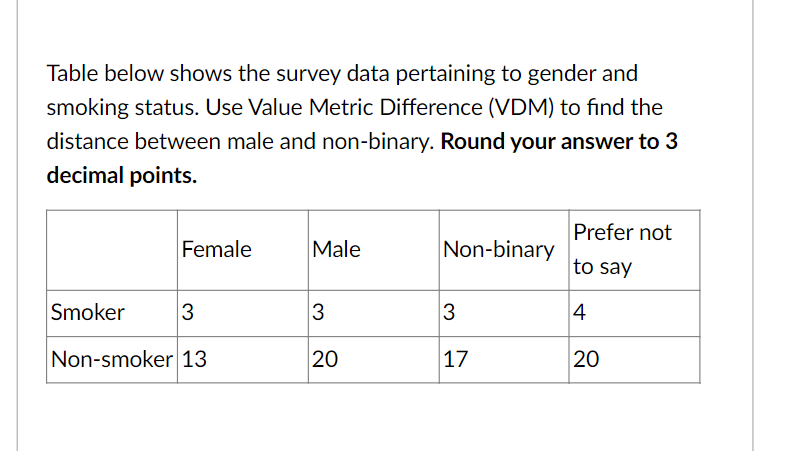

In [ ]:
# jiska distance find karna hai wo ROW hona chahiye. hence here male and binary should be row

# CODE OF PROB MATRIX IF OUTPUT COLUMN IS more than SINGLE


In [ ]:
data = {
        'Female': {'sm': 3, 'nsm' :13 },
        'Male'  : {'sm': 3, 'nsm' :20 },
        'NB': {'sm': 3, 'nsm' :17 },
        'PNS':  {'sm': 4, 'nsm' :20 }
}
df2= pd.DataFrame(data)

# to convert rows into columns
table = df2.T
table


,sm,nsm
Female,3,13
Male,3,20
NB,3,17
PNS,4,20


In [ ]:
# Find all the relevant conditional probabilities for finding VDM for male,female,NB etc
# e.g P(Smoker|female)
# Therefore, we need to find the sum in each row and then divide each cell by that value

gender_table = table.sum(axis = 1)
print(Sum)

Female    16
Male      23
NB        20
PNS       24
dtype: int64


In [ ]:
prob = table.divide(gender_table, axis = 0)
prob

,sm,nsm
Female,0.187500,0.812500
Male,0.130435,0.869565
NB,0.150000,0.850000
PNS,0.166667,0.833333


In [ ]:
# This means we have to take the difference between the corresponding cells of those 2 rows.

from scipy.spatial import distance_matrix
delta = pd.DataFrame(distance_matrix(prob.values, prob.values)**2, index=prob.index, columns=prob.index)
delta

,Female,Male,NB,PNS
Female,0.000000,0.006513,0.002812,0.000868
Male,0.006513,0.000000,0.000766,0.002625
NB,0.002812,0.000766,0.000000,0.000556
PNS,0.000868,0.002625,0.000556,0.000000


# K FOLD CROSS VALIDATION PROBLEM

Problem 1 One of the applications of validation set is to select appropriate model param-eters. In k-fold method you'll partition data into k (10 for this assignment) randomly chosen subsets of equal size. One subset is used to validate the model trained using the remaining subsets. This process is repeated k times such that each subset is used exactly once for validation. In this problem will use validation sets to pick parameters for k-nearest-neighbor (KNN) model. The data sets for this problem are healthcareTrain.csu and healthcareTest.csv. Note that you can use the built-in function for KNN, but you need to write your own code for cross-validation for this problem.

(10 points) Create a KNN classifier model to predict the pdc-80-flag using the following continuous features "total-los", "num-op", "num-er", "num-nde", "pre-total-cost" , and "pre-CCI". Use 10-fold cross validation to de termine which value of K produces the most accurate result from the range k = 31 to 101 with a step size of 2. (5 points) Use the best value of K to predict the pdc-80-flag for the test set. How does your validation error compare to test error?

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

# Load the datasets
train_df = pd.read_csv('/Users/prasanna/Documents/UOP SEMESTER 2/ML/ASSIGNMENT 5/healthcareTrain (1).csv')
test_df = pd.read_csv('/Users/prasanna/Documents/UOP SEMESTER 2/ML/ASSIGNMENT 5/healthcareTest (1).csv')

#target features
features = ['total_los', 'num_op', 'num_er', 'num_ndc', 'pre_total_cost', 'pre_CCI']

X_train = train_df[features]
y_train = train_df['pdc_80_flag']

X_test = test_df[features]
y_test = test_df['pdc_80_flag']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Dictionary to store the accuracy for each K
k_accuracy = {}

# Setting up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Testing different K values
for k in range(31, 102, 2):  # K ranges from 31 to 101 with a step size of 2
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=kf, scoring='accuracy')  # Use scaled data
    k_accuracy[k] = scores.mean()

# Finding the best K value
best_k = max(k_accuracy, key=k_accuracy.get)
best_accuracy = k_accuracy[best_k]

# Plotting accuracy rate vs. K
plt.plot(list(k_accuracy.keys()), list(k_accuracy.values()))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validated Accuracy vs K')
plt.show()

# Print the best K value and its accuracy
print("Best K value:", best_k)
print("Best cross-validated accuracy:", best_accuracy)

# Train KNN with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)  # Use scaled data

# Make predictions on the test set
predictions = knn_best.predict(X_test_scaled)  # Use scaled data

# Calculate the accuracy on the test set
test_accuracy = (predictions == y_test).mean()

# Compare validation error to test error
print("Test set accuracy:", test_accuracy)


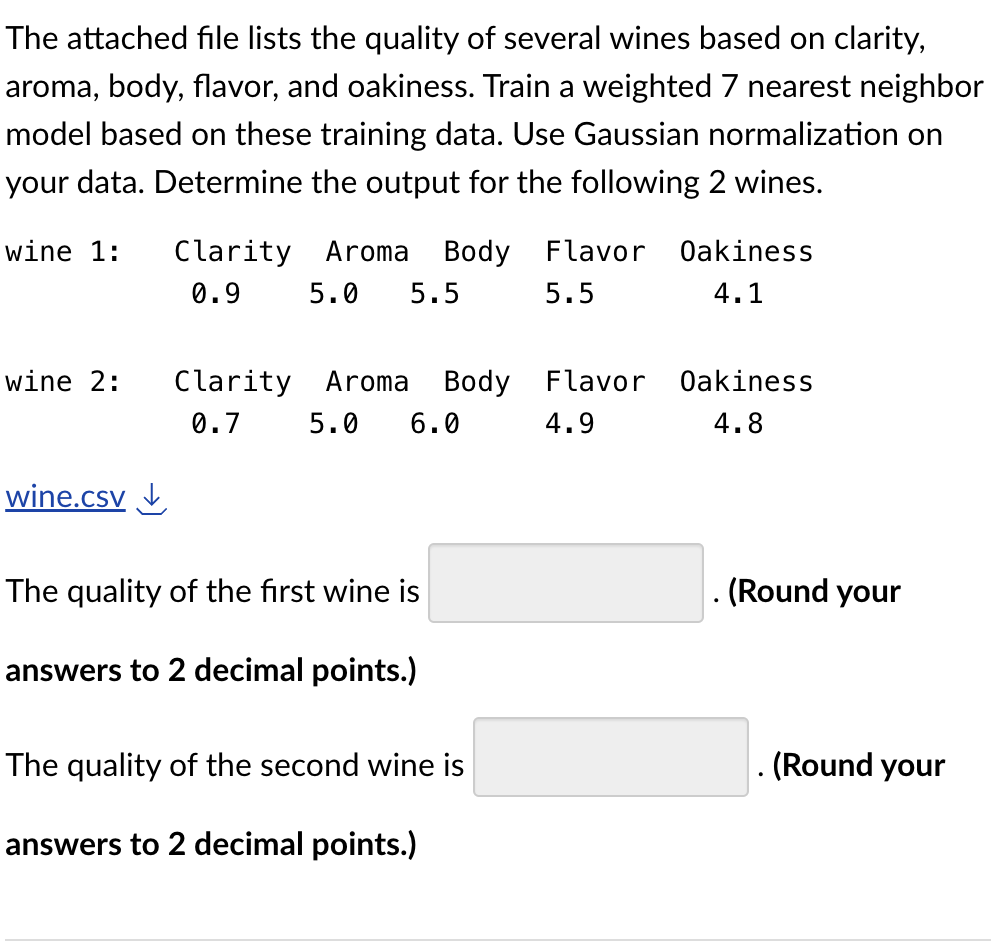

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Load the training data
# Please replace 'path_to_your_file/wine.csv' with the actual path to your CSV file
df = pd.read_csv('/Users/prasanna/Documents/UOP SEMESTER 2/ML/NOTES FOR FINAL/wine (1).csv')

# Assuming the target variable is the last column and the rest are features
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]

# Step 2: Apply Gaussian normalization (StandardScaler)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Step 3: Train a weighted 7-nearest neighbor model
knn_regressor = KNeighborsRegressor(n_neighbors=7, weights='distance')
knn_regressor.fit(X_train_normalized, y_train)

# The new wine data points to be predicted
wine1 = pd.DataFrame({
    'Clarity': [0.7],
    'Aroma': [5.0],
    'Body': [6.0],
    'Flavor': [4.9],
    'Oakiness': [4.8]
})

# Step 4: Normalize the features of the new wine data points
wine1_normalized = scaler.transform(wine1)

# Step 5: Predict the output for the new wine data points
output_wine1 = knn_regressor.predict(wine1_normalized).round(2)

# Output the prediction for wine 1
print(f"The predicted quality for Wine 1 is: {output_wine1[0]}")

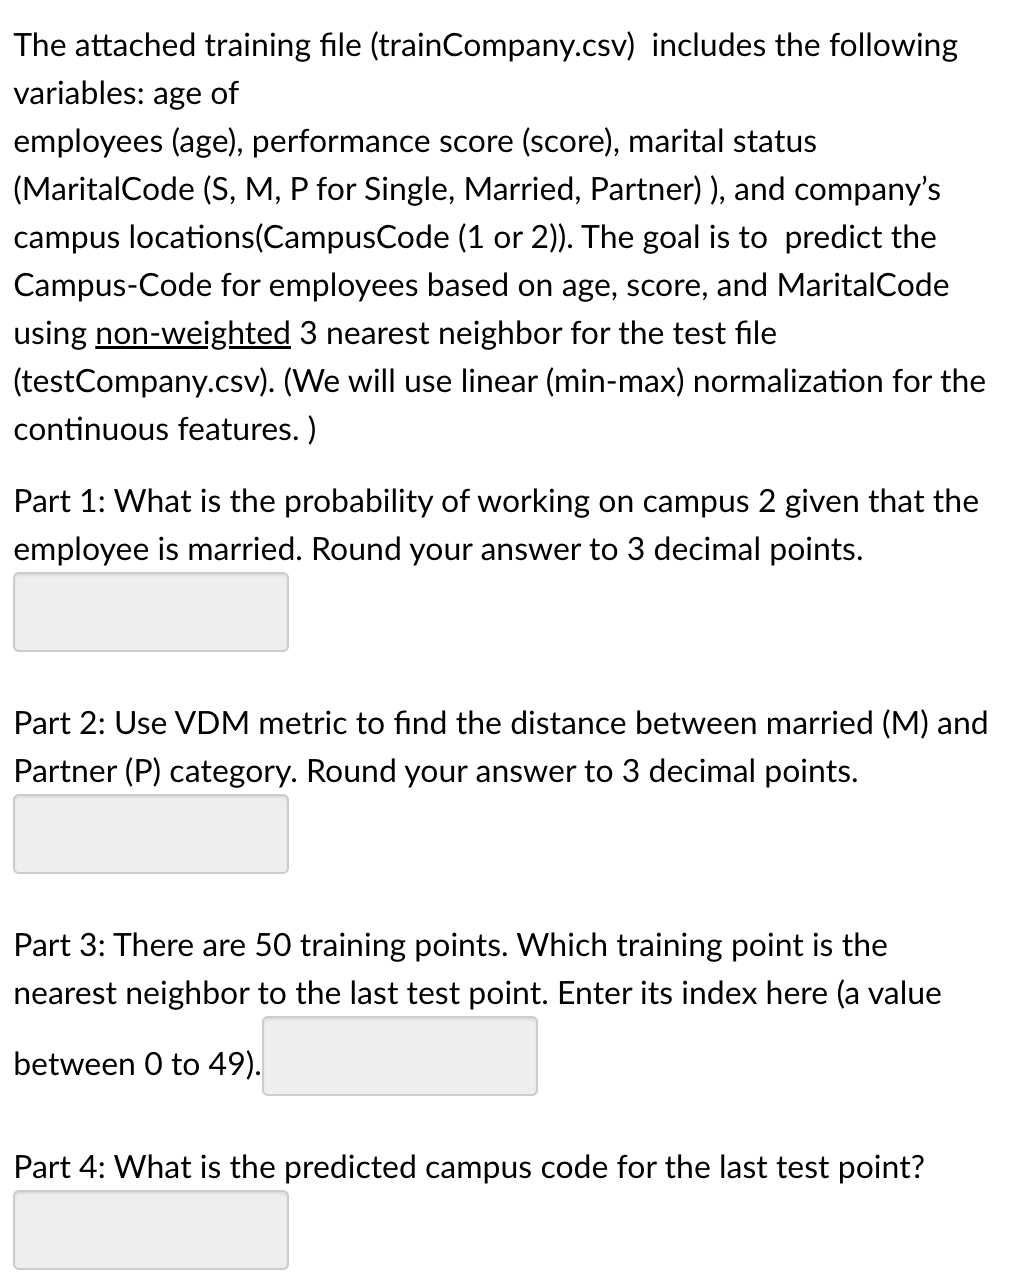

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv(r'/Users/prasanna/Documents/UOP SEMESTER 2/ML/NOTES FOR FINAL/trainCompany (1).csv')
test_data = pd.read_csv('/Users/prasanna/Downloads/testCompany (3).csv')
train_data.isnull().sum()
train_data.head()

,age,score,MaritalCode,CampusCode
0,22,81.0,S,2
1,20,81.0,S,2
2,20,71.0,S,1
3,21,72.5,S,2
4,20,72.5,S,2


In [ ]:
#numerical value assigning

Maritalcode_dict = {'M':0, 'P':1, 'S':2}
train_data['MaritalCode']=train_data['MaritalCode'].apply(lambda x:Maritalcode_dict.get(x))
train_data.head()

,age,score,MaritalCode,CampusCode
0,22,81.0,2,2
1,20,81.0,2,2
2,20,71.0,2,1
3,21,72.5,2,2
4,20,72.5,2,2


In [ ]:
test_data['MaritalCode']=test_data['MaritalCode'].apply(lambda x:Maritalcode_dict.get(x))

# CODE OF PROB MATRIX IF OUTPUT COLUMN IS SINGLE


In [ ]:
newdf= train_data[['MaritalCode','CampusCode']]

# FORMULA/CODE IF OUTPUT COLUMN IS SINGLE
prob_matrix= newdf.groupby('MaritalCode')['CampusCode'].value_counts(normalize=True).unstack()
prob_matrix = prob_matrix.fillna(0)
prob_matrix

CampusCode,1,2
MaritalCode,,
M,1.000000,0.000000
P,0.666667,0.333333
S,0.568182,0.431818


In [ ]:
from scipy.spatial import distance_matrix

vdm_matrix = pd.DataFrame(distance_matrix(prob_matrix.values, prob_matrix.values)**2, index=prob_matrix.index, columns=prob_matrix.index)
vdm_matrix

MaritalCode,M,P,S
MaritalCode,,,
M,0.000000,0.222222,0.372934
P,0.222222,0.000000,0.019399
S,0.372934,0.019399,0.000000


# **RBF**

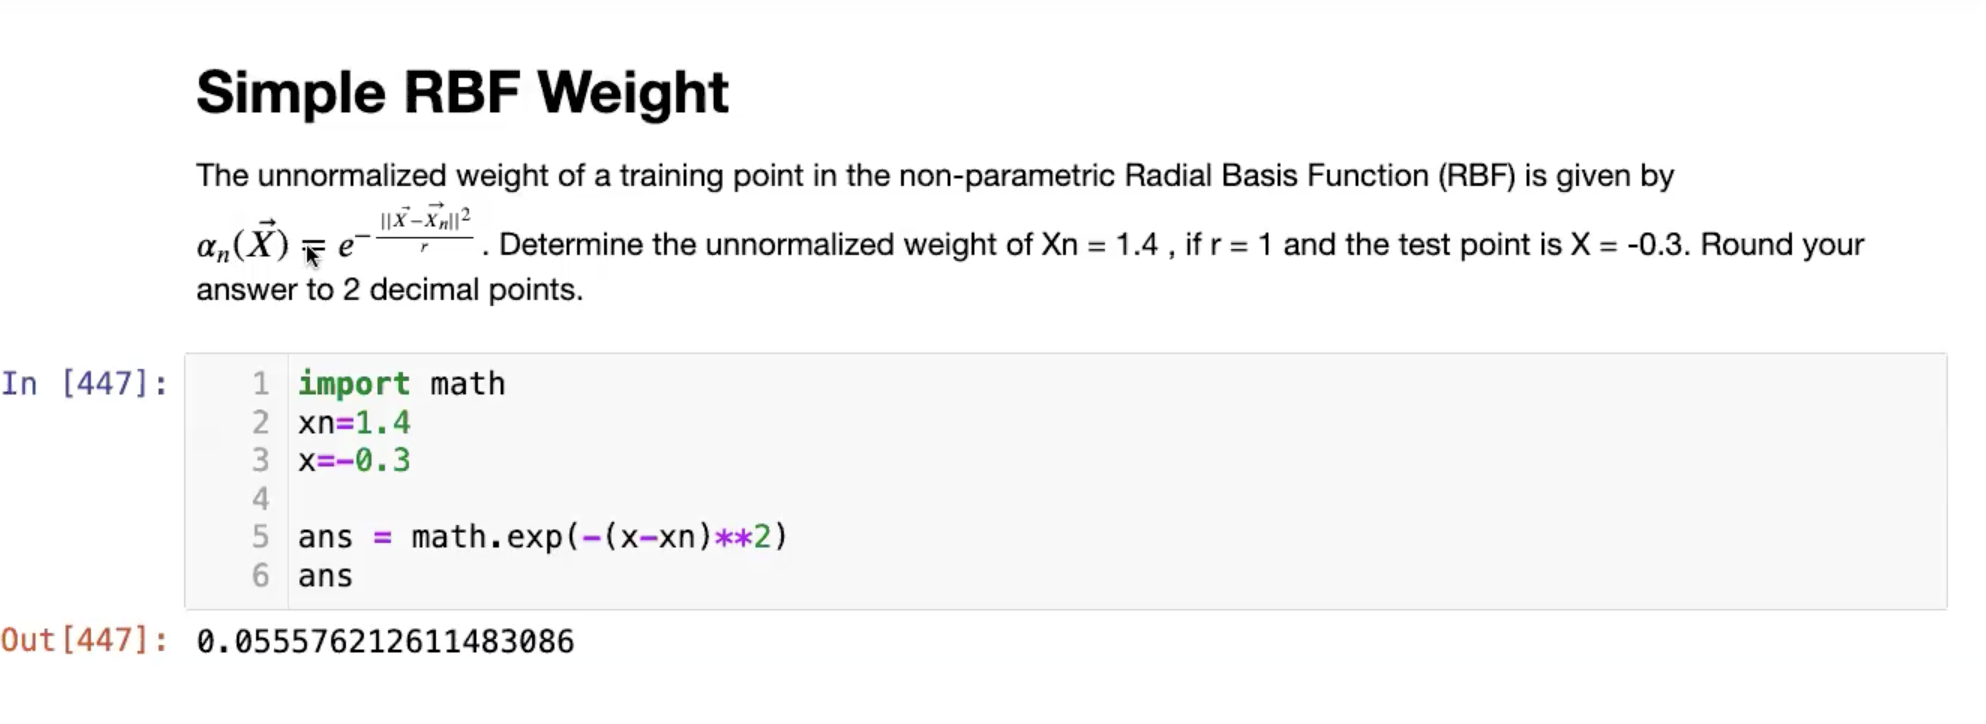

In [ ]:
import math

xn = 1.4
x = -0.3

ans = math.exp(-(x-xn)**2)
ans

0.055576212611483086

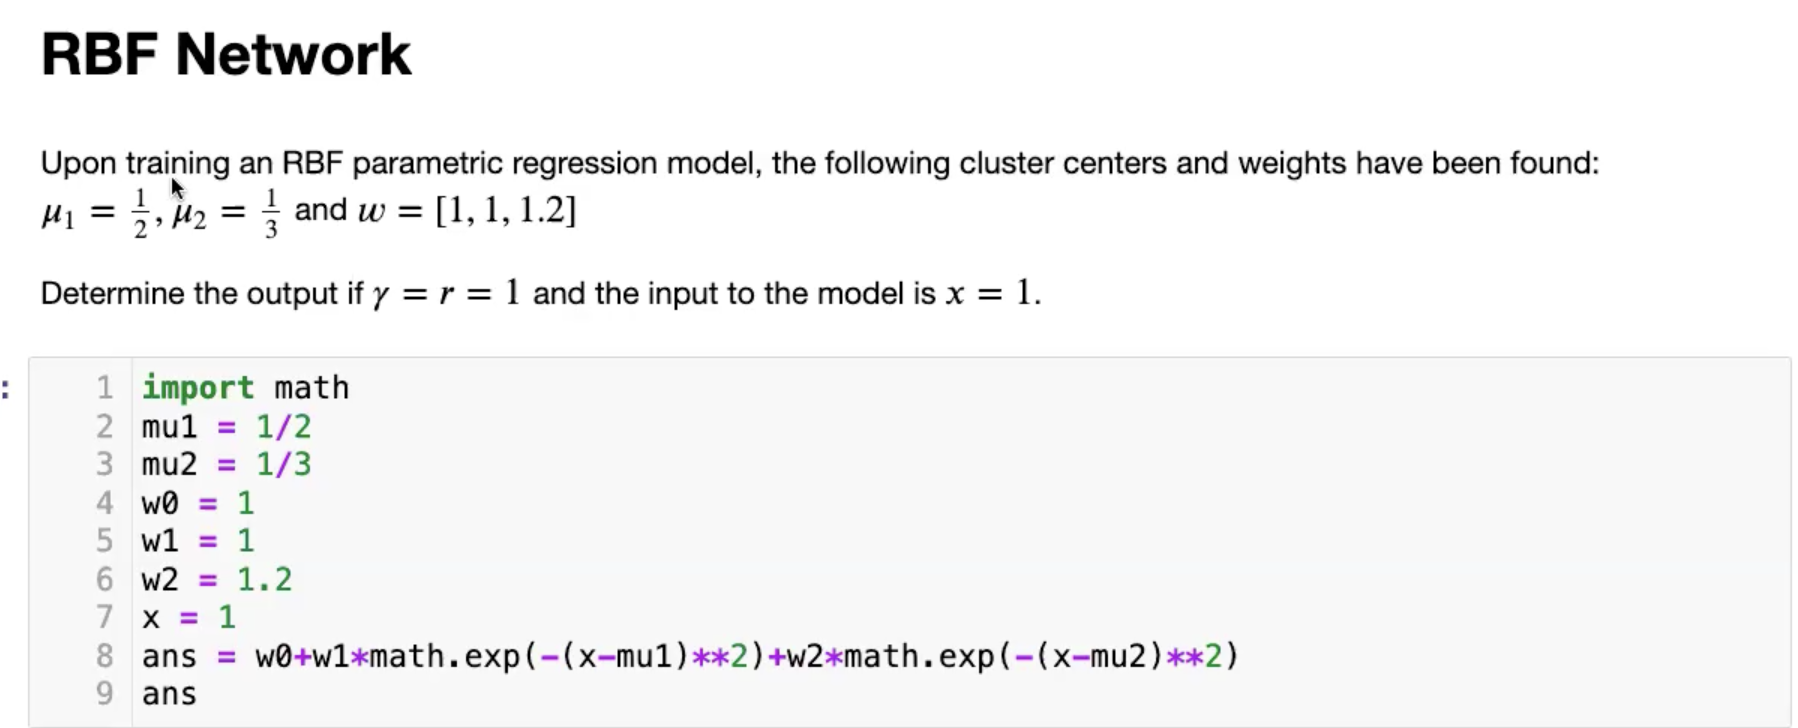

In [ ]:
import math
mu1 = 1/2
mu2 = 1/3
w0 = 1
w1 = 1
w2 = 1.2
x = 1
ans = w0+w1*math.exp(-(x-mu1)**2)+w2*math.exp(-(x-mu2)**2)
ans

2.5482172491873505